# data_p_sub.csv

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("data-p3/dat_P_sub_c.csv")

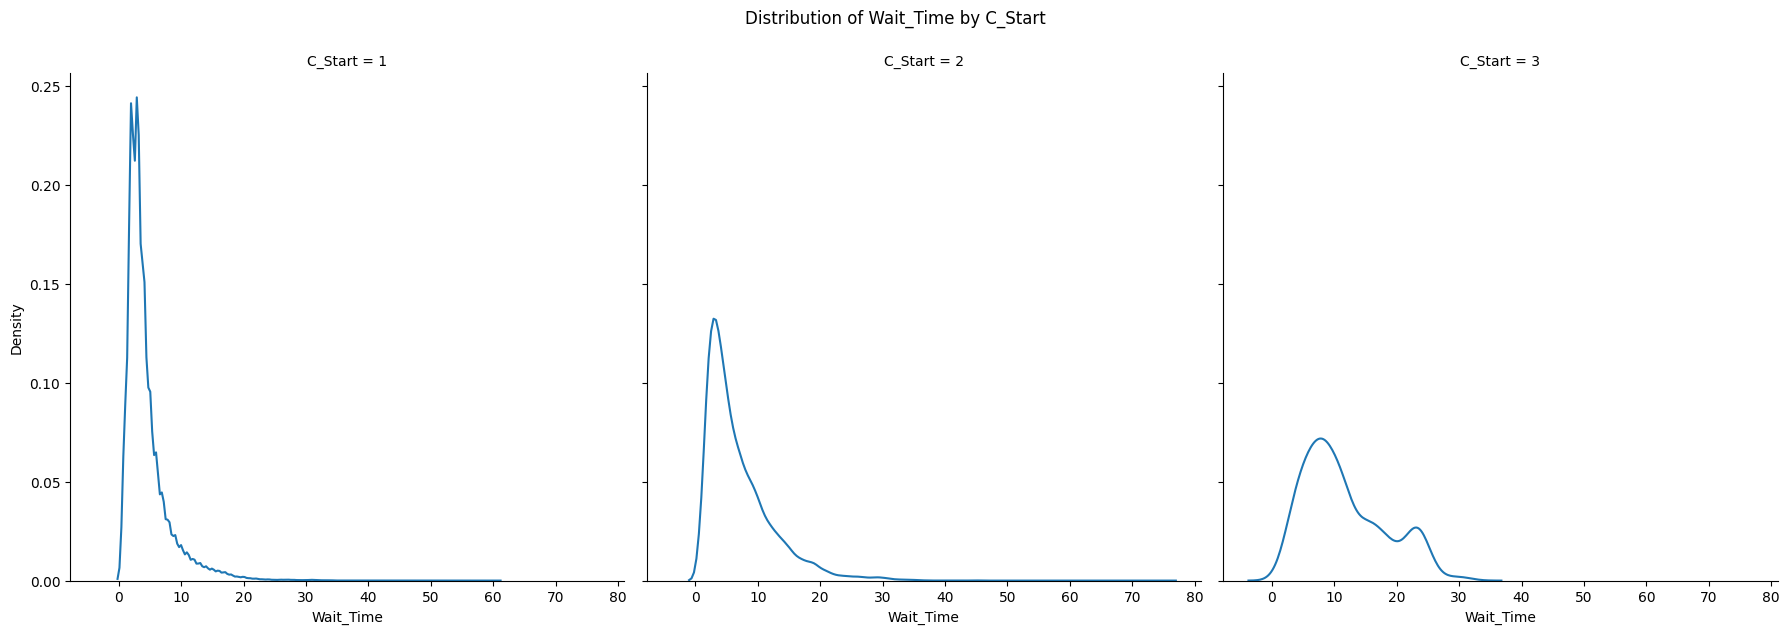

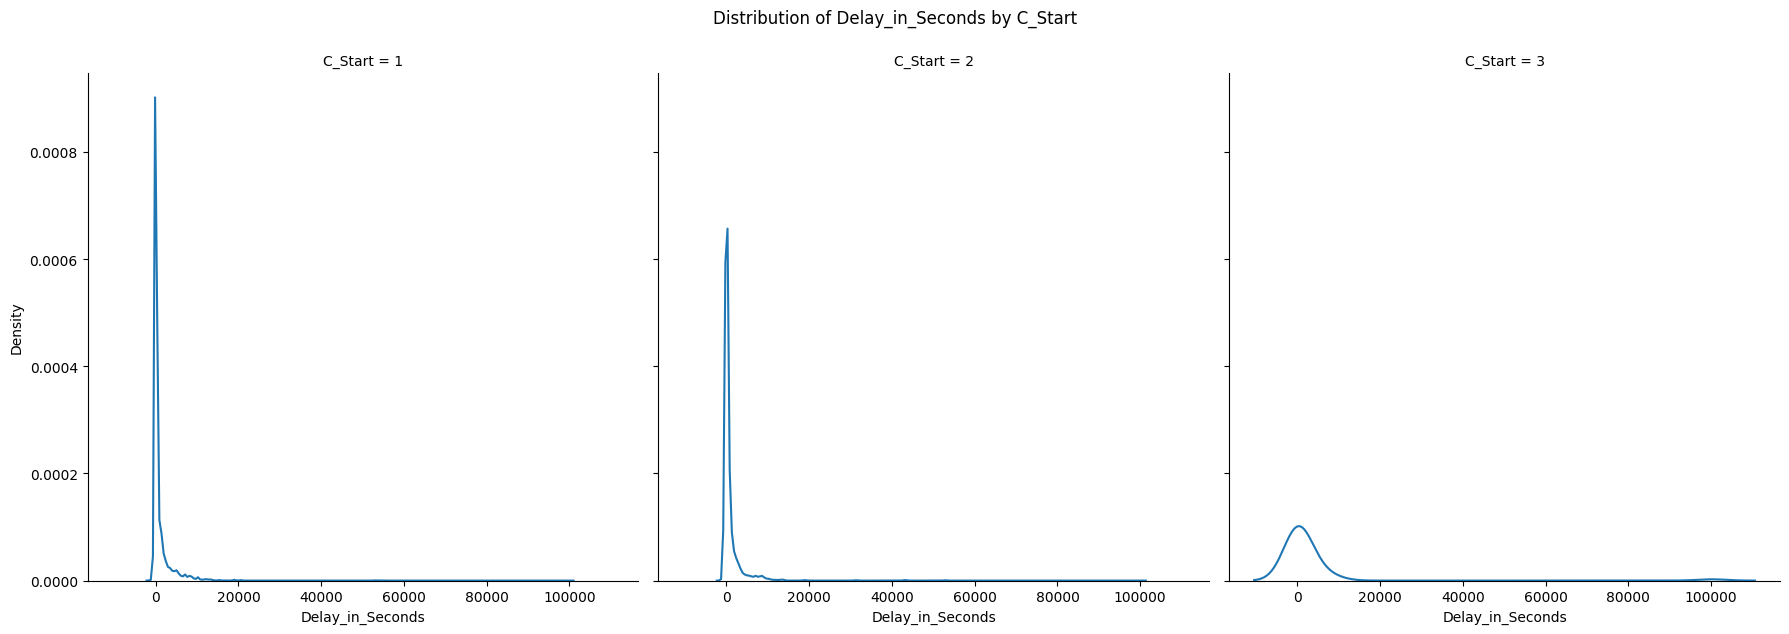

In [29]:
vars = ['Wait_Time', 'Delay_in_Seconds']
for var in vars:
    g = sns.FacetGrid(df, col="C_Start",height=6)
    g.map(sns.kdeplot, var)
    g.figure.suptitle(f"Distribution of {var} by C_Start", y=1.05)
    plt.show()

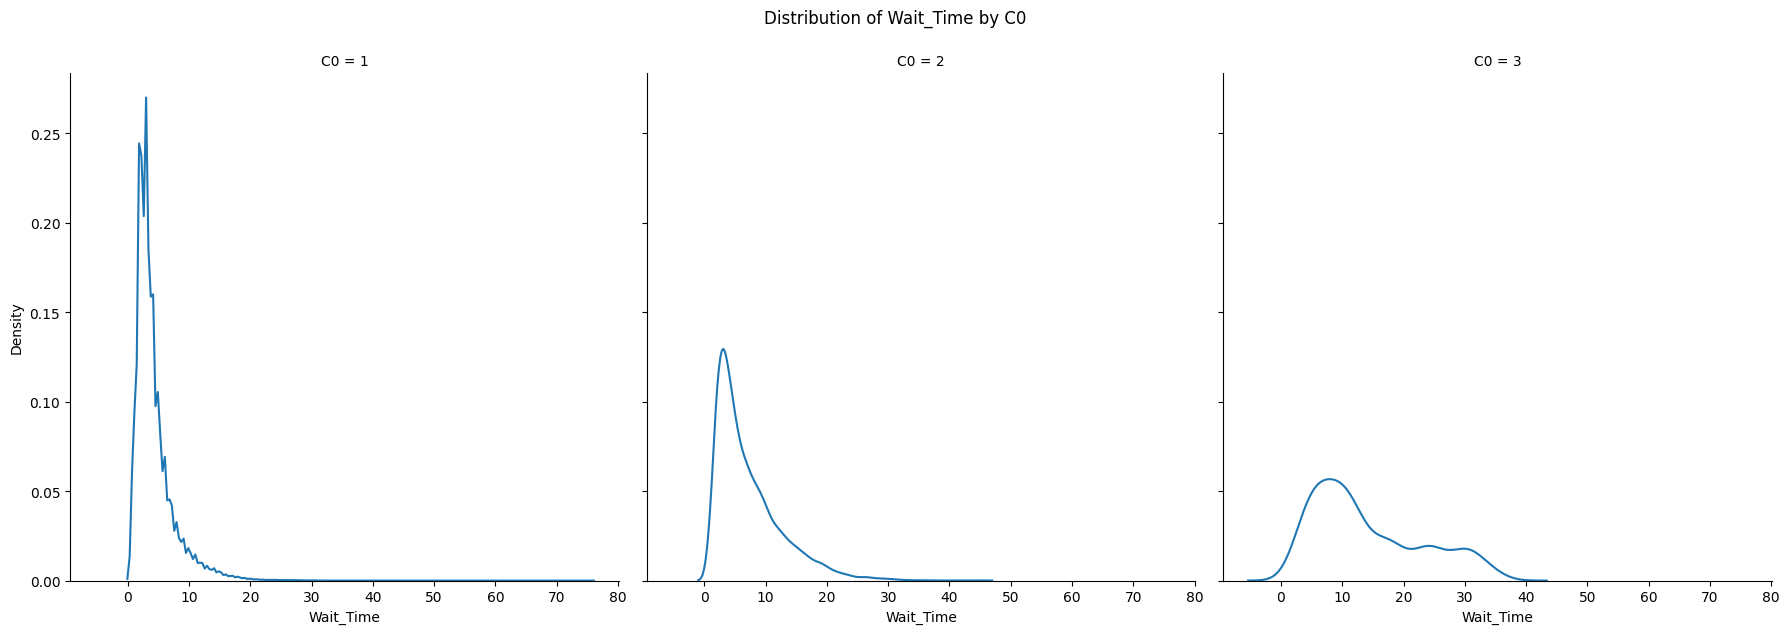

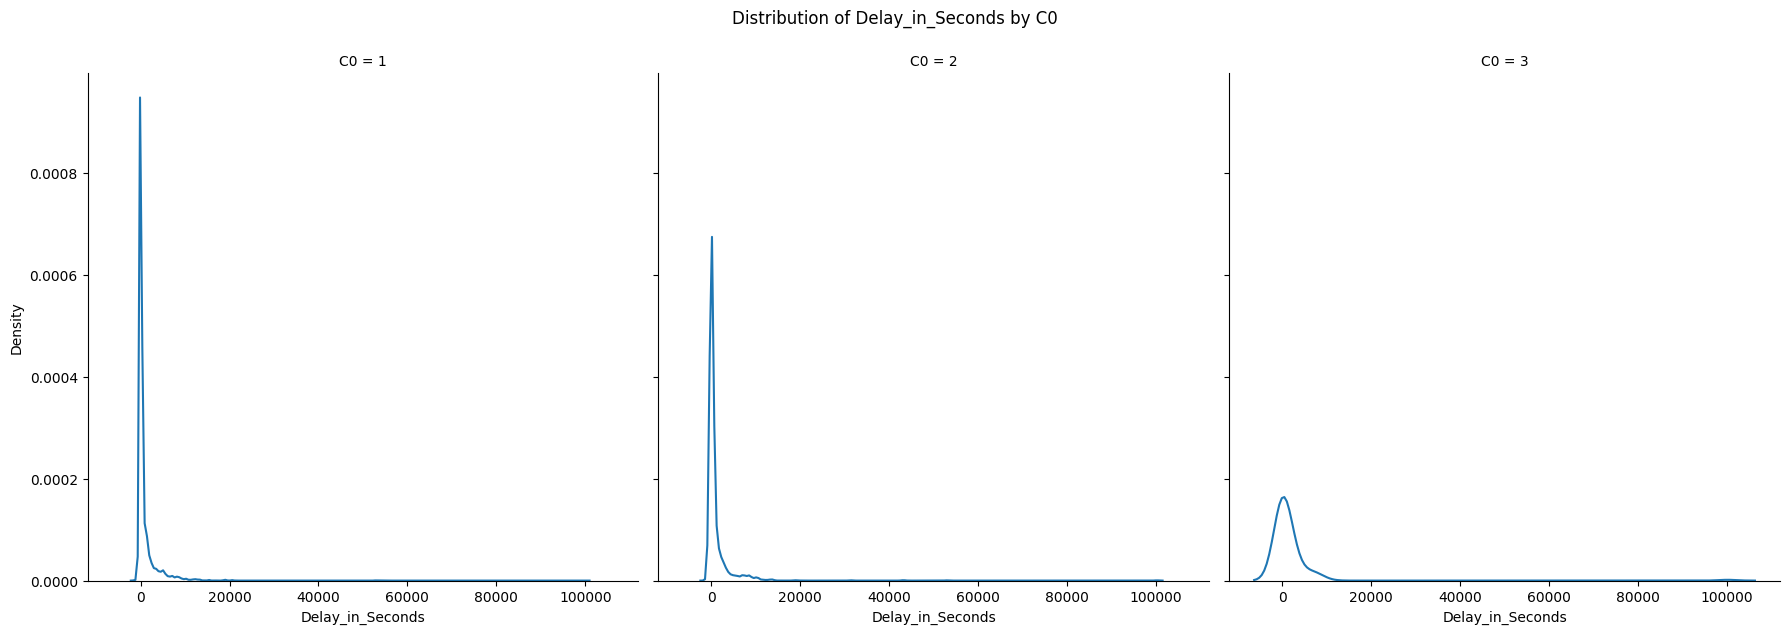

In [30]:
for var in vars:
    g = sns.FacetGrid(df, col="C0",height=6)
    g.map(sns.kdeplot, var)
    g.figure.suptitle(f"Distribution of {var} by C0", y=1.05)
    plt.show()

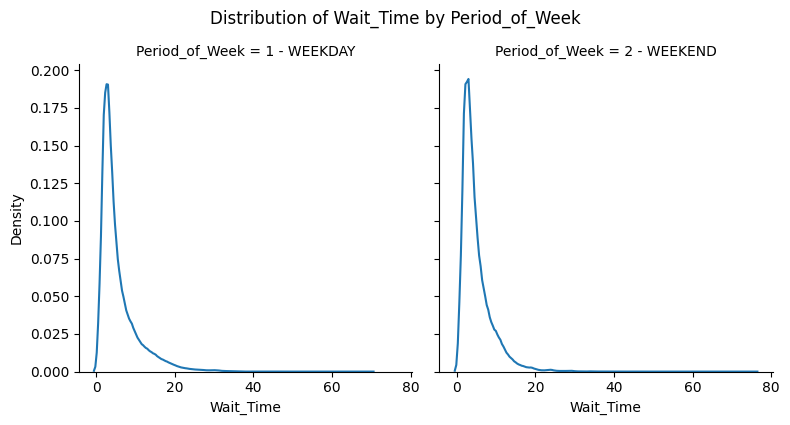

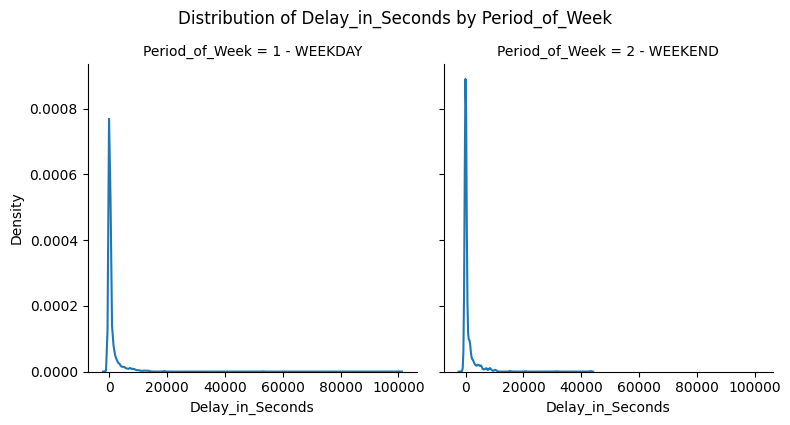

In [31]:
for var in vars:
    g = sns.FacetGrid(df, col="Period_of_Week",height=4)
    g.map(sns.kdeplot, var)
    g.figure.suptitle(f"Distribution of {var} by Period_of_Week", y=1.05)
    plt.show()

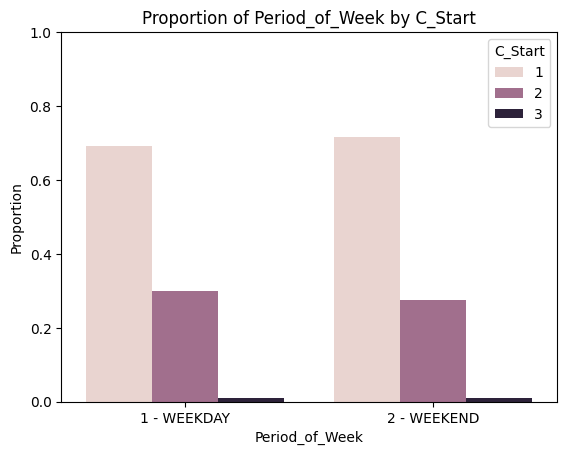

In [32]:
df_prop = (
    df.groupby('Period_of_Week')['C_Start']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Period_of_Week', y='Proportion', hue='C_Start', data=df_prop)
plt.title("Proportion of Period_of_Week by C_Start")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C_Start")
plt.ylim(0, 1)
plt.show()


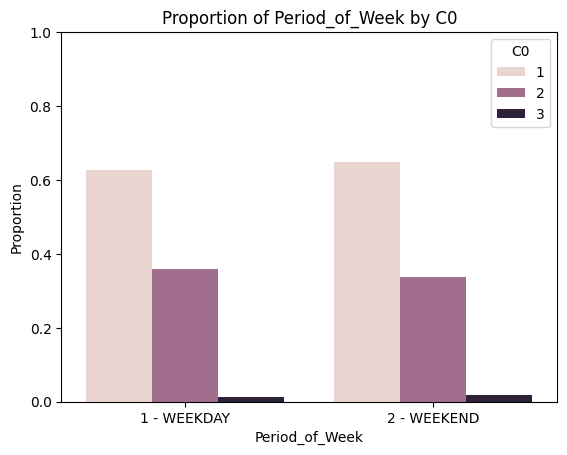

In [33]:
df_prop = (
    df.groupby('Period_of_Week')['C0']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Period_of_Week', y='Proportion', hue='C0', data=df_prop)
plt.title("Proportion of Period_of_Week by C0")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C0")
plt.ylim(0, 1)
plt.show()


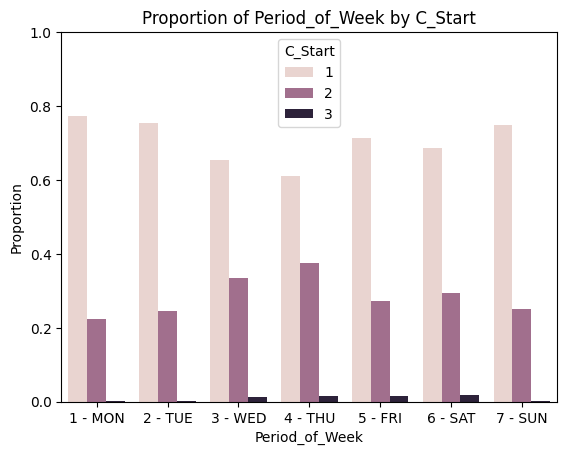

In [34]:
df_prop = (
    df.groupby('Day_of_Week')['C_Start']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Day_of_Week', y='Proportion', hue='C_Start', data=df_prop)
plt.title("Proportion of Period_of_Week by C_Start")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C_Start")
plt.ylim(0, 1)
plt.show()


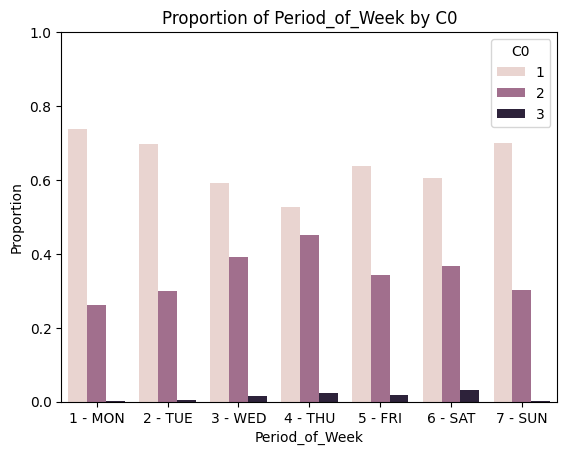

In [35]:
df_prop = (
    df.groupby('Day_of_Week')['C0']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Day_of_Week', y='Proportion', hue='C0', data=df_prop)
plt.title("Proportion of Period_of_Week by C0")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C0")
plt.ylim(0, 1)
plt.show()

In [36]:
df.columns

Index(['Pass_ID', 'valid_P_ID', 'Airfield', 'S2', 'Wait_Time', 'C_Start', 'C0',
       'C_avg', 'Sch_Departure', 'Act_Departure', 'BFO_Dest_City',
       'BFO_Destination_Country_Code', 'order', 'Departure_Date',
       'Time_of_Day', 'Period_of_Week', 'Day_of_Week', 'Month', 'Season',
       'Year', 'WT_flag', 'S2_Sch_Flag', 'S2_Act_Flag', 'Sch_Act_Flag',
       'Flight_ID', 'Delay_in_Seconds'],
      dtype='object')

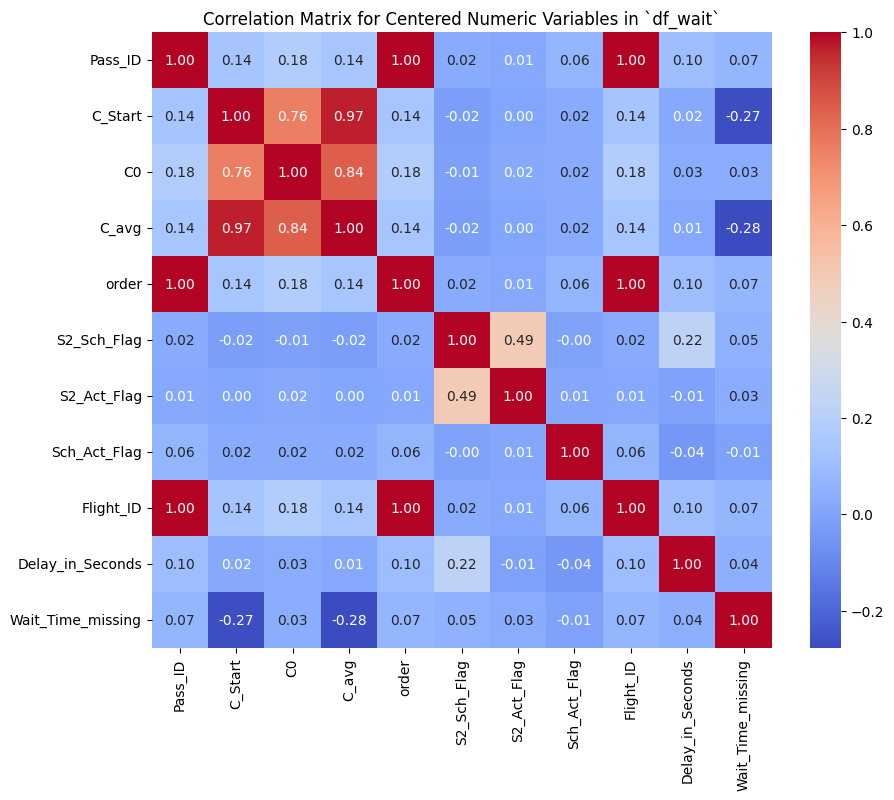

In [45]:
df_wait = df

df_wait['Wait_Time_missing'] = df_wait['Wait_Time'].isnull().astype(int)
df_wait = df_wait.select_dtypes(include='number').apply(lambda x: x - x.mean())
df_wait.drop(columns=["WT_flag","Wait_Time","valid_P_ID","Year"],inplace=True)

correlations = df_wait.corr()['Wait_Time_missing'].drop('Wait_Time_missing').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(df_wait.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Centered Numeric Variables in `df_wait`")
plt.show()

weak positive correlation between C_Start / C_avg and Wait_Time_missing - suggests fewer guards = less likely to get scanned at S1

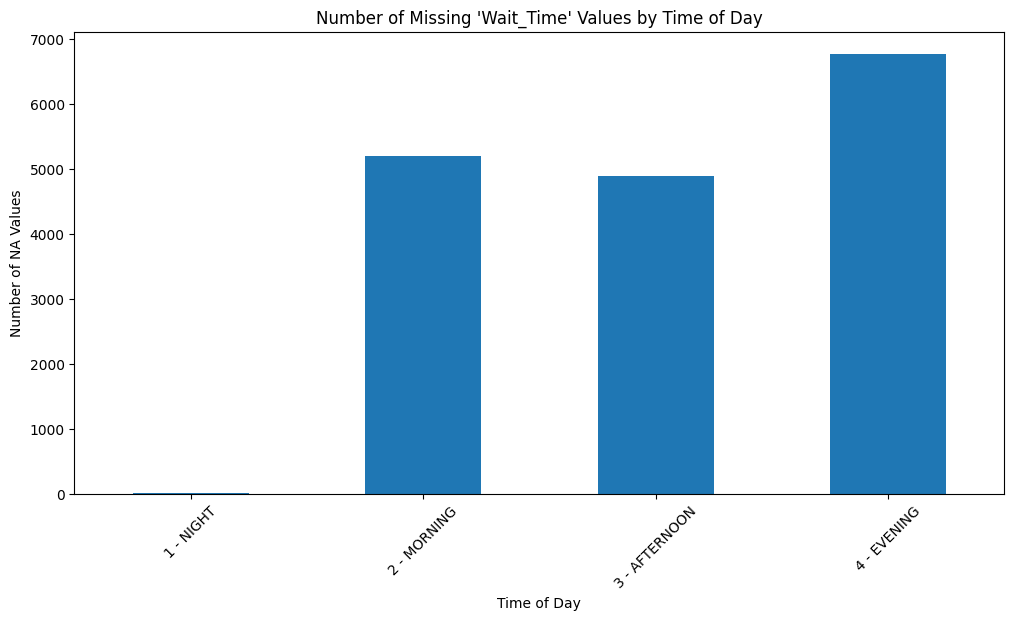

In [46]:
df_na_time_day = df[df['Wait_Time'].isnull()]['Time_of_Day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
df_na_time_day.plot(kind='bar')
plt.title("Number of Missing 'Wait_Time' Values by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of NA Values")
plt.xticks(rotation=45)
plt.show()


(array([0, 1, 2, 3]),
 [Text(0, 0, '1 - NIGHT'),
  Text(1, 0, '2 - MORNING'),
  Text(2, 0, '3 - AFTERNOON'),
  Text(3, 0, '4 - EVENING')])

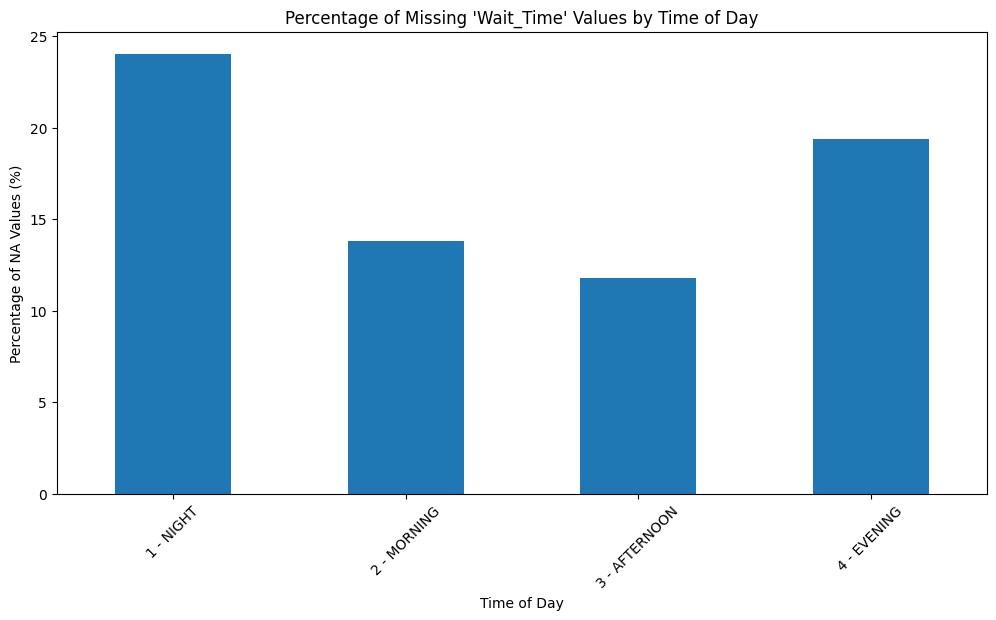

In [ ]:
total_by_time_of_day = df['Time_of_Day'].value_counts().sort_index()
df_nap_time_day = (df_na_time_day / total_by_time_of_day) * 100

plt.figure(figsize=(12, 6))
df_nap_time_day.plot(kind='bar')
plt.title("Percentage of Missing 'Wait_Time' Values by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Percentage of NA Values (%)")
plt.xticks(rotation=45)


### bleh

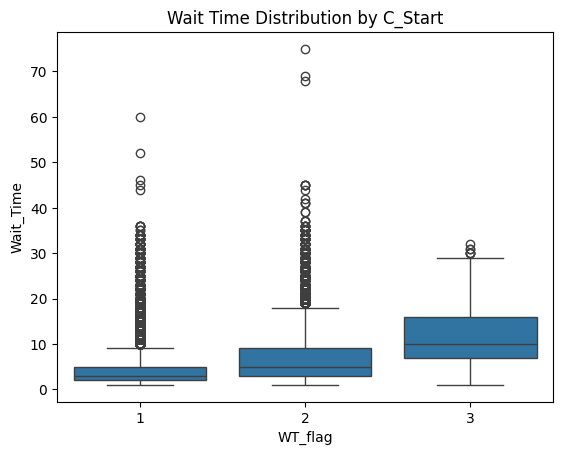

In [39]:
# plt.figure(figsize=(6, 10))
sns.boxplot(x='C_Start', y='Wait_Time', data=df)
plt.title("Wait Time Distribution by C_Start")
plt.xlabel("WT_flag")
plt.ylabel("Wait_Time")
plt.show()

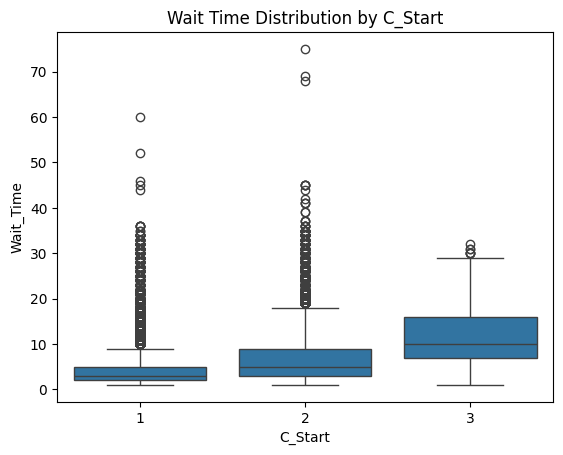

In [41]:
sns.boxplot(x='C_Start', y='Wait_Time', data=df)
plt.title("Wait Time Distribution by C_Start")
plt.xlabel("C_Start")
plt.ylabel("Wait_Time")
plt.show()

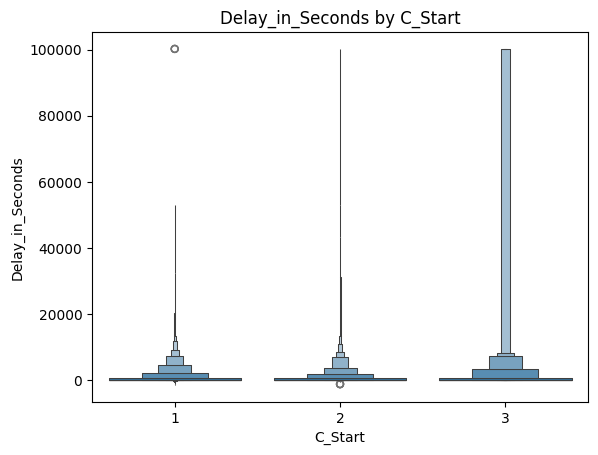

In [44]:
sns.boxenplot(x='C_Start', y='Delay_in_Seconds', data=df)
plt.title("Delay_in_Seconds by C_Start")
plt.xlabel("C_Start")
plt.ylabel("Delay_in_Seconds")
plt.show()

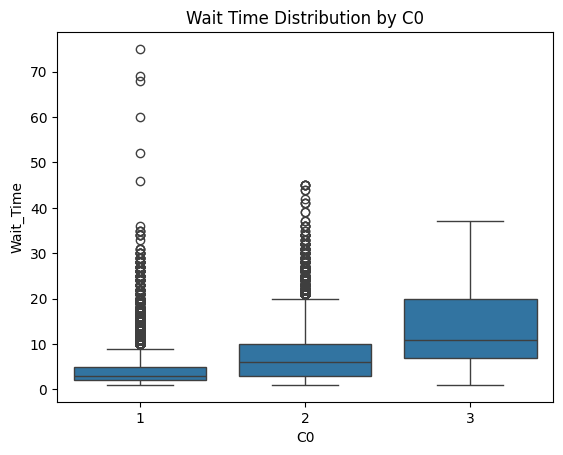

In [42]:
sns.boxplot(x='C0', y='Wait_Time', data=df)
plt.title("Wait Time Distribution by C0")
plt.xlabel("C0")
plt.ylabel("Wait_Time")
plt.show()

# Data Dictionary

In [22]:
for i in df.columns:
    print(f"| {i} | | | | |")

| Pass_ID | | | | |
| valid_P_ID | | | | |
| Airfield | | | | |
| S2 | | | | |
| Wait_Time | | | | |
| C_Start | | | | |
| C0 | | | | |
| C_avg | | | | |
| Sch_Departure | | | | |
| Act_Departure | | | | |
| BFO_Dest_City | | | | |
| BFO_Destination_Country_Code | | | | |
| order | | | | |
| Departure_Date | | | | |
| Time_of_Day | | | | |
| Period_of_Week | | | | |
| Day_of_Week | | | | |
| Month | | | | |
| Season | | | | |
| Year | | | | |
| WT_flag | | | | |
| S2_Sch_Flag | | | | |
| S2_Act_Flag | | | | |
| Sch_Act_Flag | | | | |
| Flight_ID | | | | |
| Delay_in_Seconds | | | | |


| Field    | Type | Format | Range | Description
| --- | --- | --- | --- | --- |
| Pass_ID | | | | |
| valid_P_ID | | | | |
| Airfield | | | | |
| S2 | | | | |
| Wait_Time | | | | |
| C_Start | | | | |
| C0 | | | | |
| C_avg | | | | |
| Sch_Departure | | | | |
| Act_Departure | | | | |
| BFO_Dest_City | | | | |
| BFO_Destination_Country_Code | | | | |
| order | | | | |
| Departure_Date | | | | |
| Time_of_Day | | | | |
| Period_of_Week | | | | |
| Day_of_Week | | | | |
| Month | | | | |
| Season | | | | |
| Year | | | | |
| WT_flag | | | | |
| S2_Sch_Flag | | | | |
| S2_Act_Flag | | | | |
| Sch_Act_Flag | | | | |
| Flight_ID | | | | |
| Delay_in_Seconds | | | | |

In [33]:
df.loc[df['WT_flag'] == 1, 'Wait_Time'].unique()

array([nan])

WT_flag seems to represent if the Wait_Time variable is unique

In [30]:
# plt.figure(figsize=(12, 10))
# corr_matrix = df.select_dtypes(include=['number']).drop(columns=["valid_P_ID","Year"]).dropna().corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [29]:
df["WT_flag"].value_counts()

WT_flag
0    97261
1    16871
Name: count, dtype: int64

In [18]:
# def convert_to_datetime(df):
#     converted_columns = []
#     for col in df.columns:
#         try:
#             df[col] = pd.to_datetime(df[col], errors='raise')
#             converted_columns.append(col)
#         except (ValueError, TypeError):
#             pass
#     print("Converted columns:", converted_columns)
#     return df

# df = convert_to_datetime(df)

In [8]:
df["Airfield"].value_counts()

Airfield
AUC    114132
Name: count, dtype: int64

only one airfield? weird

In [9]:
df['S2'].value_counts()

S2
2028-11-25 18:34    10
2028-12-29 17:30    10
2028-12-30 18:51     9
2028-12-23 8:01      9
2028-11-12 17:19     9
                    ..
2028-10-24 12:51     1
2028-10-24 13:40     1
2028-10-24 13:45     1
2028-10-24 13:47     1
2028-12-31 19:21     1
Name: count, Length: 63179, dtype: int64

In [10]:
df['Sch_Departure'].value_counts()

Sch_Departure
2028-10-28 19:46    229
2028-11-04 18:46    220
2028-11-11 19:46    209
2028-11-21 9:51     166
2028-12-27 12:36    159
                   ... 
2028-09-12 12:36      1
2028-11-18 14:31      1
2028-11-18 16:06      1
2028-09-02 12:16      1
2028-12-20 20:46      1
Name: count, Length: 3433, dtype: int64